In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import community
import random
from networkx.drawing.nx_agraph import graphviz_layout
import numpy as np

In [4]:
g = nx.read_edgelist("facebook_combined.txt")

print(g)
nx.density(g)

Graph with 4039 nodes and 88234 edges


0.010819963503439287

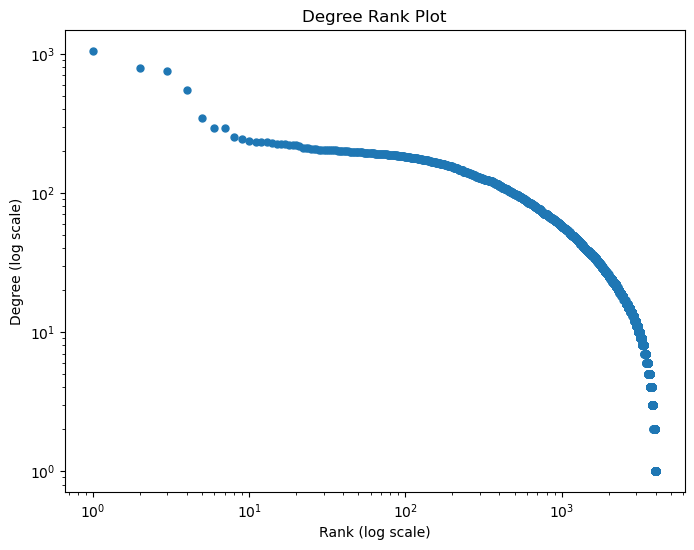

In [5]:
#looking at the entire network in a log-log graph
degree_sequence = sorted([d for n, d in g.degree()], reverse=True)
rank = range(1, len(degree_sequence) + 1)
plt.figure(figsize=(8, 6))
plt.loglog(rank, degree_sequence, marker="o", linestyle="None", markersize=5, label="Degree Rank")
plt.xlabel("Rank (log scale)")
plt.ylabel("Degree (log scale)")
plt.title("Degree Rank Plot")
plt.show()

In [6]:

#want to look for maximum minimum and average degrees using numpy arrays
degrees = [d for _, d in g.degree()]
print("Mean",np.mean(degrees))
print("Max",np.max(degrees))
print("Min",np.min(degrees))


Mean 43.69101262688784
Max 1045
Min 1


In [7]:
#more information about the whole network
diameter = nx.diameter(g)
avg_short_path = nx.average_shortest_path_length(g)
print("Diameter:",diameter)
print("Average Shortest Path",avg_short_path)

Diameter: 8
Average Shortest Path 3.6925068496963913


In [8]:
#using greedy modularity communities begin to look at communities within the larger network
from networkx.algorithms.community import greedy_modularity_communities
communities = list(greedy_modularity_communities(g))
print("Number of communities:",len(communities))
sizes_of_communities = [len(comm) for comm in communities]
print("Sizes of communities:",sizes_of_communities)

Number of communities: 16
Sizes of communities: [1031, 739, 547, 542, 357, 220, 208, 206, 59, 49, 25, 22, 19, 6, 6, 3]


In [ ]:
#look at modularity score
from networkx.algorithms.community.quality import modularity
modularity_score = modularity(g, communities)
print("Modularity Score:",modularity_score)

In [11]:
#looking to the top 2-3 largest communities
sorted_communities = sorted(communities, key=len, reverse=True)
print("largest community:",len(sorted_communities[0]))
print("second largest community:",len(sorted_communities[1]))
print("third largest community:",len(sorted_communities[2]))
#assign these to values for analysis later
first_large_community = sorted_communities[0]
second_large_community = sorted_communities[1]
third_large_community = sorted_communities[2]
#including a top3 all in one just in case
top_communities = sorted_communities[:3]


largest community: 1031
second largest community: 739
third largest community: 547


Graph with 1031 nodes and 26395 edges
Graph with 739 nodes and 12518 edges
Graph with 547 nodes and 5323 edges


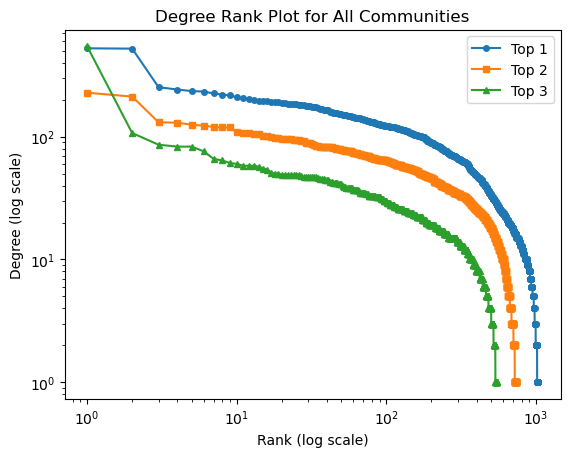

In [12]:
#now going to try to put them all on one and see if that shows me anything
markers = ["o","s","^"]
for index, comm in enumerate(top_communities):
    subgraph = g.subgraph(comm)
    degree_seq = sorted([d for n, d in subgraph.degree()], reverse=True)
    rank = range(1, len(degree_seq) + 1)
    plt.loglog(rank, degree_seq, marker=markers[index], markersize=4, label=f"Top {index+1}")
plt.xlabel("Rank (log scale)")
plt.ylabel("Degree (log scale)")
plt.title("Degree Rank Plot for All Communities")
plt.legend()
plt.show()


In [14]:
import matplotlib.pyplot as plt
import networkx as nx
import community
import random
from networkx.drawing.nx_agraph import graphviz_layout  # requires python-graphviz and pygraphviz

In [17]:
#looking at code related to what was shown during class

dendrogram = community.generate_dendrogram(g)
for level in range(len(dendrogram)) :
    print(set(community.partition_at_level(dendrogram, level).values()))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100}
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17}
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}


0 4039
1 101
2 18


/srv/conda/envs/notebook/lib/python3.9/site-packages/pygraphviz/agraph.py:1407: RuntimeWarning: Warning: 1 is not a known color.

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


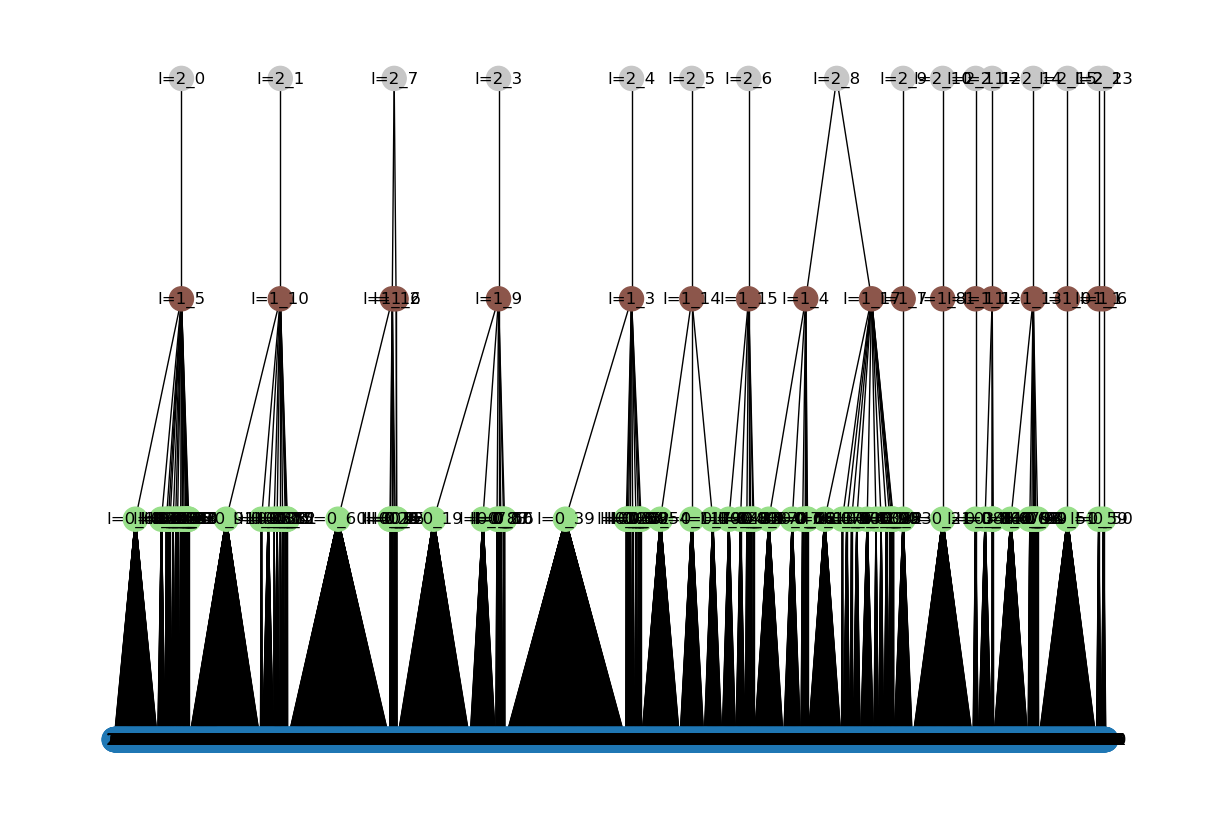

In [18]:
pg = nx.DiGraph()

last_part = None
for l, part in enumerate(dendrogram):
    print(l, len(part))
    for n, comm in part.items():
        # level = ?, community = ?
        nom = "l={}_{}".format(l, comm)
        pg.add_node(nom, comm=comm, color=l+1)

        if l == 0:
            pg.add_node(n, comm=comm, color=0)
            pg.add_edge(nom, n)
        else: 
            pg.add_edge(nom, "l={}_{}".format(l-1, n))
    last_part = part
   

plt.figure(figsize=(12,8))

colors = list(nx.get_node_attributes(pg, 'color').values())

pos = graphviz_layout(pg, prog='dot')
nx.draw(pg, pos, with_labels=True, arrows=False, node_color=colors, vmin=0, vmax=len(dendrogram) + 1, cmap=plt.cm.tab20)

In [19]:
cs = list(nx.get_node_attributes(pg,'color').values())

In [21]:
part = community.best_partition(g) # Compute the partition of the graph nodes which maximises the modularity (or try..) using the Louvain heuristices
print("Community Modularity:",community.modularity(part, g))

Community Modularity: 0.8347392024414877


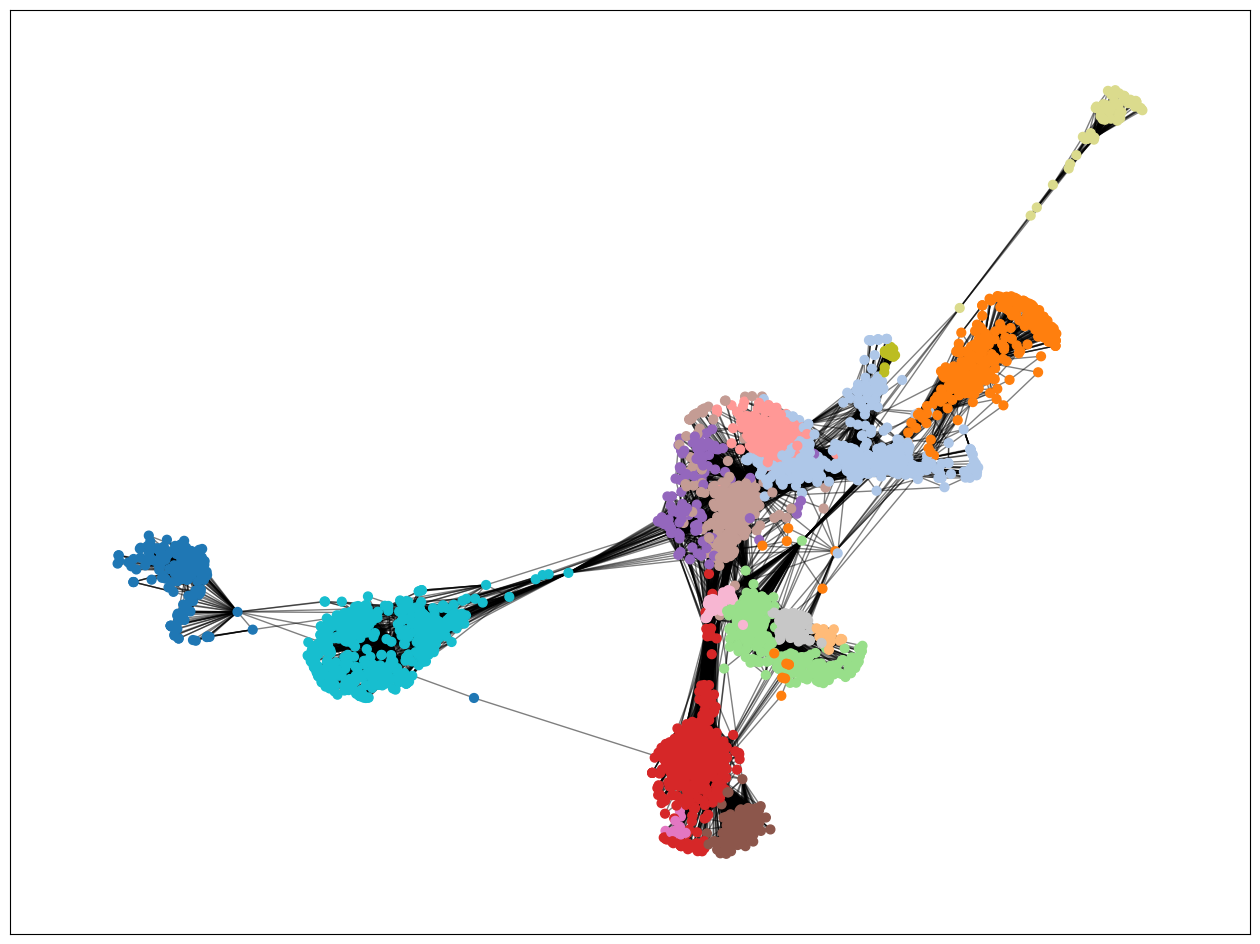

In [26]:
import scipy
plt.figure(figsize=(16, 12))

partition = community.best_partition(g)

#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(g)
node_list = [n for n, n_com in sorted(partition.items())]
node_colors = [n_com for n, n_com in sorted(partition.items())]
    
nx.draw_networkx_nodes(g, pos, node_list, node_size=40, 
                       # the arguments below here make each community a different color
                       vmin=0, vmax=size,
                       node_color=node_colors, cmap=plt.cm.tab20)
    #print(count)
nx.draw_networkx_edges(g, pos, alpha=0.5)
plt.show()